In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split


plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [3]:
#读取数据
df_a=pd.read_csv("C:\\Users\\lenovo\\毕设-20212133050\\AD_merged.csv")
#df_a.head()

In [4]:
df_n=pd.read_csv("C:\\Users\\lenovo\\毕设-20212133050\\normal_merged.csv")
#df_n.head()

In [5]:
df_a.columns

Index(['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号', 'ALT',
       'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G',
       'CHE', 'TBA', 'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr',
       'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB',
       'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK', 'CK-MB', 'LDH',
       'α-HBDH', 'MYO', 'CRP', 'HCY', 'NT-proBNP', 'HbA1C'],
      dtype='object')

In [6]:
df_n.columns

Index(['报告单元', '样本日期', '样本号', '年龄', '性别', '科室', '就诊卡号', '病历号', 'ALT', 'AST',
       'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G',
       'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C',
       'LDL-C', 'APOA-1', 'APOB', 'K', 'Na', 'Cl', 'CK', 'CK-MB', 'LDH', 'HCY',
       '临床诊断', 'HbA1C'],
      dtype='object')

In [7]:
#为数据集做标注
df_a["阿尔茨海默病"]=1
df_n["阿尔茨海默病"]=0
print(df_a)
print(df_n)

         报告单元        样本日期  样本号     年龄 性别  \
0      生化·流水线  2022/01/01  803    70岁  女   
1      生化·流水线  2022/01/01  804  56岁6月  男   
2      生化·流水线  2022/01/01  815  55岁7月  男   
3      生化·流水线  2022/01/01  818  52岁9月  男   
4      生化·流水线  2022/01/04  802  67岁2月  男   
...       ...         ...  ...    ... ..   
7428  生化·综合项目  2024/08/02    6  85岁1月  女   
7429  生化·综合项目  2024/08/02   30  82岁6月  女   
7430  生化·综合项目  2024/08/05   30  62岁1月  男   
7431  生化·综合项目  2024/08/06   95  61岁1月  女   
7432  生化·综合项目  2024/08/06   97  84岁7月  女   

                                                   临床诊断        科室  \
0                                                阿尔茨海默病   老年病科一病区   
1                                                阿尔茨海默病    精神科二病区   
2                                                阿尔茨海默病      PICU   
3                                                阿尔茨海默病      PICU   
4                                                阿尔茨海默病   老年病科三病区   
...                                                 ...  

0表示正常，1表示患病

In [8]:
# 对性别进行0-1编码
gender_mapping = {'男': 1, '女': 0}

df_a['性别'] = df_a['性别'].map(gender_mapping)
df_n['性别'] = df_n['性别'].map(gender_mapping)

In [9]:
df_a.columns

Index(['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号', 'ALT',
       'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G',
       'CHE', 'TBA', 'PA', '5-NT', 'ADA', 'UREA', 'UA', 'CREA', 'BUN/Scr',
       'CYS-C', 'β2MG', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB',
       'LPa', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'hsCRP', 'CK', 'CK-MB', 'LDH',
       'α-HBDH', 'MYO', 'CRP', 'HCY', 'NT-proBNP', 'HbA1C', '阿尔茨海默病'],
      dtype='object')

In [10]:
df_n.columns

Index(['报告单元', '样本日期', '样本号', '年龄', '性别', '科室', '就诊卡号', '病历号', 'ALT', 'AST',
       'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G',
       'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C',
       'LDL-C', 'APOA-1', 'APOB', 'K', 'Na', 'Cl', 'CK', 'CK-MB', 'LDH', 'HCY',
       '临床诊断', 'HbA1C', '阿尔茨海默病'],
      dtype='object')

In [11]:
common_columns = list(set(df_a.columns) & set(df_n.columns))
print(common_columns)

['K', 'CK-MB', 'GLU', 'TP', 'ALT', 'DBIL', 'AST', 'UA', '样本日期', 'APOB', '就诊卡号', 'UREA', '科室', 'ALP', 'GGT', '阿尔茨海默病', 'HbA1C', '年龄', 'IBIL', 'CYS-C', '报告单元', 'GLOB', 'A/G', 'HCY', 'BUN/Scr', 'TBIL', 'TG', 'CK', 'CREA', '病历号', 'Cl', 'LDH', 'TC', 'ALB', '样本号', '性别', 'LDL-C', 'Na', 'HDL-C', 'APOA-1', '临床诊断']


In [12]:
df_a_common = df_a[common_columns]
df_n_common = df_n[common_columns]

In [13]:
df = pd.concat([df_a_common, df_n_common], axis=0, ignore_index=False)


#查看合并后的列名
print(df.columns)

Index(['K', 'CK-MB', 'GLU', 'TP', 'ALT', 'DBIL', 'AST', 'UA', '样本日期', 'APOB',
       '就诊卡号', 'UREA', '科室', 'ALP', 'GGT', '阿尔茨海默病', 'HbA1C', '年龄', 'IBIL',
       'CYS-C', '报告单元', 'GLOB', 'A/G', 'HCY', 'BUN/Scr', 'TBIL', 'TG', 'CK',
       'CREA', '病历号', 'Cl', 'LDH', 'TC', 'ALB', '样本号', '性别', 'LDL-C', 'Na',
       'HDL-C', 'APOA-1', '临床诊断'],
      dtype='object')


In [14]:
desired_order =['报告单元','样本日期', '样本号', '年龄','性别','临床诊断', '科室', '就诊卡号', '病历号',
                'TBIL', 'ALB', 'CK-MB', 'Na', 'GGT', 'GLU', 'HCY', 'AST', 'CREA', 'IBIL', 'BUN/Scr', 'K', 'APOB',
                'LDH', 'ALP', 'TP', 'A/G', 'TG','APOA-1', 'UA','GLOB','HbA1C', 'LDL-C', 'DBIL','CK', 'CYS-C', 'UREA',
                'HDL-C', 'TC', 'ALT', 'Cl','阿尔茨海默病', ]
df = df[desired_order]
print(df)

          报告单元        样本日期  样本号      年龄  性别    临床诊断       科室  \
0       生化·流水线  2022/01/01  803     70岁   0  阿尔茨海默病  老年病科一病区   
1       生化·流水线  2022/01/01  804   56岁6月   1  阿尔茨海默病   精神科二病区   
2       生化·流水线  2022/01/01  815   55岁7月   1  阿尔茨海默病     PICU   
3       生化·流水线  2022/01/01  818   52岁9月   1  阿尔茨海默病     PICU   
4       生化·流水线  2022/01/04  802   67岁2月   1  阿尔茨海默病  老年病科三病区   
...        ...         ...  ...     ...  ..     ...      ...   
10195  生化·综合项目  2024/08/02  121   15岁7月   0     NaN     体检中心   
10196  生化·综合项目  2024/08/04   45   15岁7月   1     NaN     体检中心   
10197  生化·综合项目  2024/08/04   46  15岁10月   1     NaN     体检中心   
10198  生化·综合项目  2024/08/04   47     15岁   0     NaN     体检中心   
10199  生化·综合项目  2024/08/06   93  58岁10月   0     NaN     体检中心   

                     就诊卡号       病历号  TBIL  ...  LDL-C  DBIL     CK  CYS-C  \
0      522632195112250021  00143532   8.2  ...    2.4   3.0   67.0   1.41   
1                01001664  00140986   8.0  ...    1.4   2.6  122.0   1.03   


In [15]:
exclude_columns = ['报告单元', '样本日期', '临床诊断', '科室', '就诊卡号', '病历号']
df = df.drop(columns=exclude_columns)

In [18]:
desired_order =[ '年龄','性别',
                'TBIL', 'ALB', 'CK-MB', 'Na', 'GGT', 'GLU', 'HCY', 'AST', 'CREA', 'IBIL', 'BUN/Scr', 'K', 'APOB',
                'LDH', 'ALP', 'TP', 'A/G', 'TG','APOA-1', 'UA','GLOB','HbA1C', 'LDL-C', 'DBIL','CK', 'CYS-C', 'UREA',
                'HDL-C', 'TC', 'ALT', 'Cl','阿尔茨海默病']
df = df[desired_order]

# 分离数值型和分类型特征
numeric_features = []
categorical_features = []
for col in df.columns:
    if col != '阿尔茨海默病':
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_features.append(col)
        else:
            categorical_features.append(col)

# 数值型特征的单因素分析（t检验）
for feature in numeric_features:
    group_yes = df[df['阿尔茨海默病'] == 1][feature].dropna()
    group_no = df[df['阿尔茨海默病'] == 0][feature].dropna()
    if len(group_yes) < 2 or len(group_no) < 2:
        p_value = float('nan')
    else:
        _, p_value = ttest_ind(group_yes, group_no, equal_var=False, nan_policy='omit')
    print(f"{feature} 与 阿尔茨海默病 的 t 检验 p 值: {p_value}")

# 分类型特征的单因素分析（卡方检验）
for feature in categorical_features:
    contingency_table = pd.crosstab(df['阿尔茨海默病'], df[feature])
    if contingency_table.size == 0:
        p_value = float('nan')
    else:
        _, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature} 与 阿尔茨海默病 的卡方检验 p 值: {p_value}")

性别 与 阿尔茨海默病 的 t 检验 p 值: 3.7273680520408397e-37
TBIL 与 阿尔茨海默病 的 t 检验 p 值: 2.3598069608477398e-73
ALB 与 阿尔茨海默病 的 t 检验 p 值: 0.0
CK-MB 与 阿尔茨海默病 的 t 检验 p 值: 0.22482758316148785
Na 与 阿尔茨海默病 的 t 检验 p 值: 7.341173368213737e-47
GGT 与 阿尔茨海默病 的 t 检验 p 值: 0.4415545644316238
GLU 与 阿尔茨海默病 的 t 检验 p 值: 5.156313741629763e-62
HCY 与 阿尔茨海默病 的 t 检验 p 值: 2.1773393099642227e-05
AST 与 阿尔茨海默病 的 t 检验 p 值: 1.5580415194388395e-05
CREA 与 阿尔茨海默病 的 t 检验 p 值: 2.251652929533066e-23
IBIL 与 阿尔茨海默病 的 t 检验 p 值: 3.188000078389009e-250
BUN/Scr 与 阿尔茨海默病 的 t 检验 p 值: 3.9597870536827187e-81
K 与 阿尔茨海默病 的 t 检验 p 值: 0.963163112089279
APOB 与 阿尔茨海默病 的 t 检验 p 值: 3.344259323096585e-33
LDH 与 阿尔茨海默病 的 t 检验 p 值: 1.3217847235082977e-09
ALP 与 阿尔茨海默病 的 t 检验 p 值: 4.9481091037253586e-15
TP 与 阿尔茨海默病 的 t 检验 p 值: 0.0
A/G 与 阿尔茨海默病 的 t 检验 p 值: 0.0
TG 与 阿尔茨海默病 的 t 检验 p 值: 2.923239150539089e-35
APOA-1 与 阿尔茨海默病 的 t 检验 p 值: 1.7105148424372479e-44
UA 与 阿尔茨海默病 的 t 检验 p 值: 9.77264860262011e-124
GLOB 与 阿尔茨海默病 的 t 检验 p 值: 0.39198132908795824
HbA1C 与 阿尔茨海默病 

这些结果是对各特征与阿尔茨海默病之间关系进行单因素分析的p值，用于判断各因素与阿尔茨海默病是否存在显著关联，具体解释如下：

t检验p值解读
    1.极显著相关：TBIL、Na、GLU、IBIL、BUN/Scr等指标的p值非常小，如TBIL的p值为2.3598069608477398e-73，说明在统计学意义上，这些指标与阿尔茨海默病存在极显著的相关性。以TBIL为例，意味着在样本中，患有和未患有阿尔茨海默病的两组人群，其TBIL指标的均值存在极显著差异，这种差异极不可能是由随机误差造成的。
    2.显著相关：HCY、AST等指标的p值相对较小但大于上述极显著水平的p值，如HCY的p值为2.1773393099642227e-05，表明这些指标与阿尔茨海默病有显著的相关性，即两组人群在这些指标上的均值差异有较大可能不是随机因素导致的，而是与是否患阿尔茨海默病有关。
    3.无显著相关：CK-MB、GGT等指标的p值较大，如CK-MB的p值为0.22482758316148785，说明在当前样本数据下，没有足够的证据表明这些指标与阿尔茨海默病之间存在显著的线性关系，即患有和未患有阿尔茨海默病的两组人群在这些指标上的均值差异可能是由随机因素引起的。

卡方检验p值解读：年龄与阿尔茨海默病的卡方检验p值为0.0，这表明在统计学意义上，年龄与阿尔茨海默病之间存在极其显著的关联。即在样本中，不同年龄分布与是否患有阿尔茨海默病之间的关系并非是随机的，而是存在明显的相关性，不同年龄段患阿尔茨海默病的概率存在显著差异。

一般来说，在统计学中，通常以0.05作为显著性水平的临界值。p值小于0.05时，通常认为存在显著的统计学差异；p值大于0.05时，则认为没有足够证据表明存在显著差异。但在实际研究中，还需要结合具体的研究背景、专业知识以及其他相关因素来综合判断这些结果的意义和价值。


In [19]:
df.isnull().sum()

年龄             0
性别             0
TBIL        3876
ALB        10836
CK-MB      13512
Na         11616
GGT        10762
GLU         6815
HCY        17132
AST         3548
CREA        5520
IBIL        3936
BUN/Scr     5525
K          11616
APOB       15634
LDH        15180
ALP        11093
TP         10986
A/G        11064
TG         10396
APOA-1     15634
UA          5725
GLOB       11064
HbA1C      16877
LDL-C      10408
DBIL        3936
CK         13513
CYS-C      11532
UREA        5525
HDL-C      10408
TC         10396
ALT         3472
Cl         11583
阿尔茨海默病         0
dtype: int64

In [20]:
miss_value=((df.isnull().sum())/len(df))*100
print(miss_value.round(2))

年龄          0.00
性别          0.00
TBIL       21.98
ALB        61.45
CK-MB      76.63
Na         65.88
GGT        61.03
GLU        38.65
HCY        97.16
AST        20.12
CREA       31.30
IBIL       22.32
BUN/Scr    31.33
K          65.88
APOB       88.66
LDH        86.09
ALP        62.91
TP         62.30
A/G        62.75
TG         58.96
APOA-1     88.66
UA         32.47
GLOB       62.75
HbA1C      95.71
LDL-C      59.03
DBIL       22.32
CK         76.63
CYS-C      65.40
UREA       31.33
HDL-C      59.03
TC         58.96
ALT        19.69
Cl         65.69
阿尔茨海默病      0.00
dtype: float64


In [21]:
#df.to_csv('df.csv', index=False)

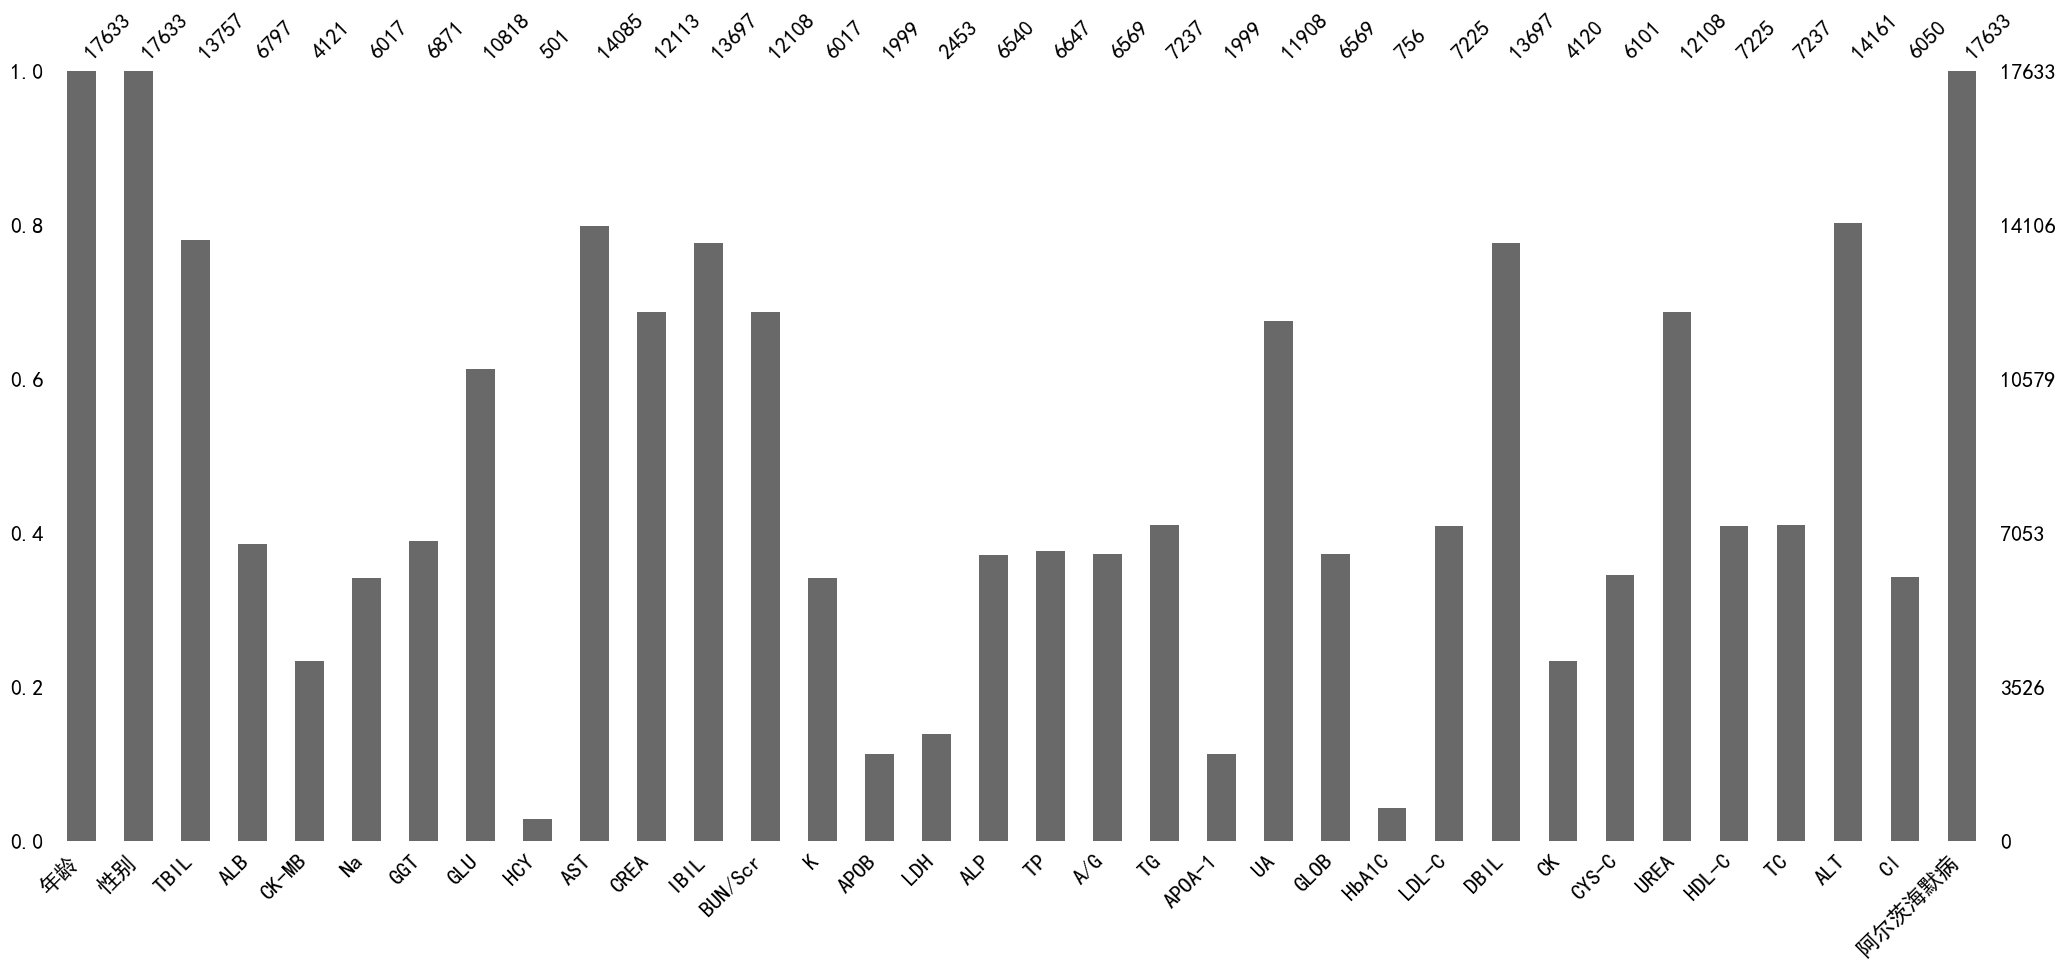

In [22]:
msno.bar(df)
plt.show()

In [23]:
missing_ratio = df.isnull().mean()

# 找出缺失值比例小于40%的列
columns_less_40_percent_missing = missing_ratio[missing_ratio < 0.4].index.tolist()


print("特征缺失值比例小于40%的列有：", columns_less_40_percent_missing)

特征缺失值比例小于50%的列有： ['年龄', '性别', 'TBIL', 'GLU', 'AST', 'CREA', 'IBIL', 'BUN/Scr', 'UA', 'DBIL', 'UREA', 'ALT', '阿尔茨海默病']


In [25]:
columns_to_check = ['年龄', '性别', 'TBIL', 'GLU', 'AST', 'CREA', 'IBIL',
                    'BUN/Scr', 'UA', 'DBIL', 'UREA', 'ALT', '阿尔茨海默病']

df_cleaned1 = df.dropna(subset=columns_to_check)


print("删除缺失值后的数据集：")
print(df_cleaned1)

删除缺失值后的数据集：
          年龄  性别  TBIL   ALB  CK-MB     Na   GGT    GLU  HCY   AST  ...  \
0        70岁   0   8.2  38.3   14.0  143.0  16.0  12.39  NaN  21.0  ...   
1      56岁6月   1   8.0  42.0   13.0  145.0  19.0   5.48  NaN  17.0  ...   
2      55岁7月   1   6.4  40.0   15.0  144.0  44.0   5.49  NaN  16.0  ...   
3      52岁9月   1  13.8  38.7   11.0  145.0  13.0   4.93  NaN  20.0  ...   
5      61岁6月   0  10.1  38.2   10.0  144.0   8.0   5.08  NaN  17.0  ...   
...      ...  ..   ...   ...    ...    ...   ...    ...  ...   ...  ...   
10170  52岁4月   1  14.2   NaN    NaN    NaN   NaN   5.50  NaN  25.0  ...   
10172  19岁5月   0  18.8   NaN    NaN    NaN   NaN   5.04  NaN  13.0  ...   
10185  42岁4月   0  23.0   NaN    NaN    NaN   NaN   6.62  NaN  16.0  ...   
10187  24岁4月   0  12.1   NaN    NaN    NaN   NaN   4.85  NaN  20.0  ...   
10189  43岁8月   1   9.3   NaN    NaN    NaN   NaN   5.74  NaN  21.0  ...   

       LDL-C  DBIL     CK  CYS-C  UREA  HDL-C    TC   ALT     Cl  阿尔茨海默病  
0       2.40

In [26]:
df_cleaned1.isnull().sum()

年龄             0
性别             0
TBIL           0
ALB         5327
CK-MB       6757
Na          6406
GGT         5328
GLU            0
HCY         9638
AST            0
CREA           0
IBIL           0
BUN/Scr        0
K           6406
APOB        8114
LDH         7939
ALP         5654
TP          5327
A/G         5327
TG          3517
APOA-1      8114
UA             0
GLOB        5327
HbA1C      10034
LDL-C       3524
DBIL           0
CK          6760
CYS-C       5447
UREA           0
HDL-C       3524
TC          3517
ALT            0
Cl          6406
阿尔茨海默病         0
dtype: int64

In [27]:
columns_to_keep = [ '年龄', '性别', 'GLU', 'CREA', 'DBIL', 'IBIL', 'UA', 
                   'AST', 'ALT', 'UREA', 'TBIL', 'BUN/Scr','阿尔茨海默病']

# 删除除了这些特征之外的其他特征
#df_cleaned2 = df_cleaned1[columns_to_keep]
df_cleaned2 = df_cleaned1[columns_to_keep].copy()  # 添加 .copy()

# 打印结果
print("删除除了指定特征之外的其他特征后的数据集：")
print(df_cleaned2)

删除除了指定特征之外的其他特征后的数据集：
          年龄  性别    GLU  CREA  DBIL  IBIL     UA   AST   ALT  UREA  TBIL  \
0        70岁   0  12.39  62.8   3.0   5.2  255.0  21.0  22.0  7.05   8.2   
1      56岁6月   1   5.48  67.0   2.6   5.4  346.0  17.0  17.0  3.76   8.0   
2      55岁7月   1   5.49  83.2   1.8   4.6  452.0  16.0  15.0  3.62   6.4   
3      52岁9月   1   4.93  69.0   5.1   8.7  294.0  20.0  14.0  3.30  13.8   
5      61岁6月   0   5.08  74.1   3.8   6.3  256.0  17.0  11.0  1.95  10.1   
...      ...  ..    ...   ...   ...   ...    ...   ...   ...   ...   ...   
10170  52岁4月   1   5.50  99.9   4.0  10.2  397.0  25.0  26.0  3.78  14.2   
10172  19岁5月   0   5.04  78.5   5.4  13.4  353.0  13.0   9.0  6.06  18.8   
10185  42岁4月   0   6.62  63.6   6.7  16.3  337.0  16.0  12.0  3.29  23.0   
10187  24岁4月   0   4.85  50.5   3.9   8.2  347.0  20.0  32.0  3.72  12.1   
10189  43岁8月   1   5.74  73.9   2.5   6.8  470.0  21.0  37.0  4.77   9.3   

       BUN/Scr  阿尔茨海默病  
0         28.0       1  
1         14.0 

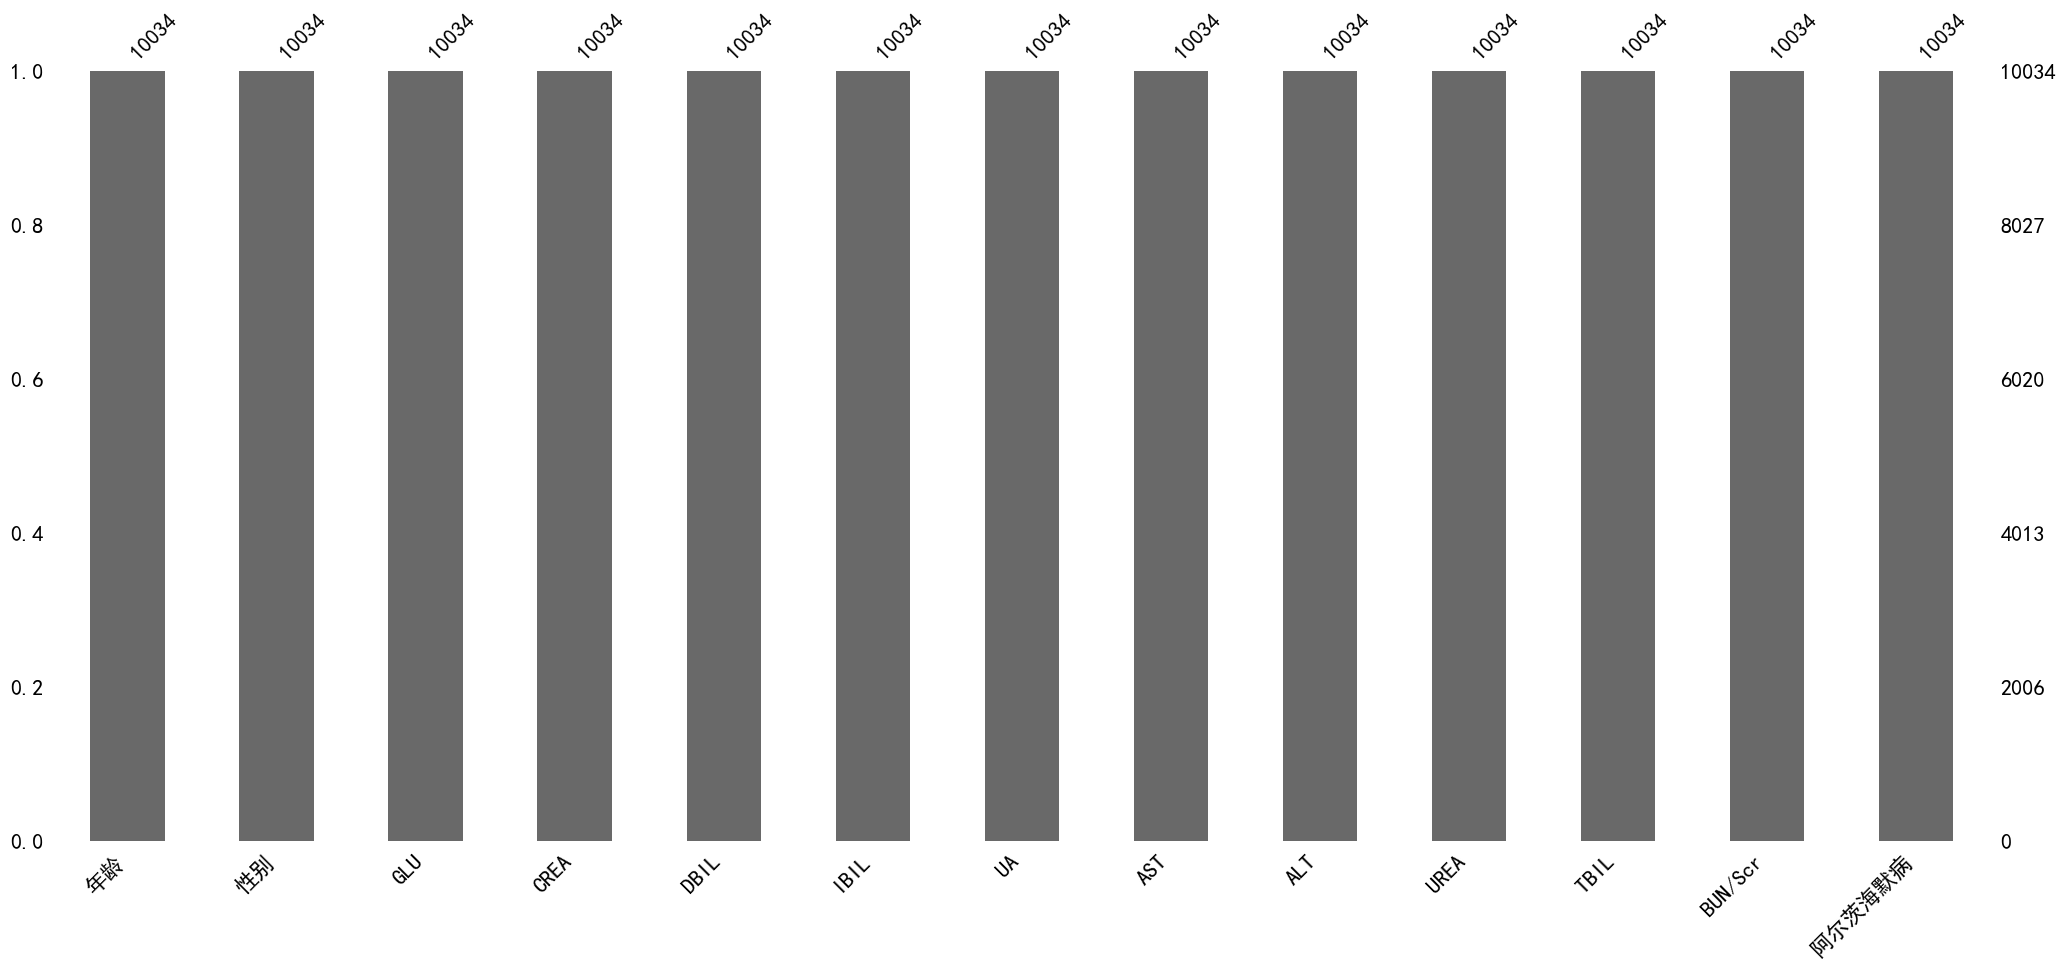

In [28]:
msno.bar(df_cleaned2)
plt.show()

In [29]:
df_cleaned2.describe()

,性别,GLU,CREA,DBIL,IBIL,UA,AST,ALT,UREA,TBIL,BUN/Scr,阿尔茨海默病
count,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000
mean,0.465119,5.971195,76.564949,3.962906,8.665528,357.279749,22.614909,24.621886,4.904937,12.628434,16.375424,0.372334
std,0.498807,2.025259,29.651499,3.298254,4.447378,108.251133,31.547881,23.454343,2.190778,6.916986,5.916027,0.483451
min,0.000000,2.140000,20.600000,0.000000,0.500000,47.000000,5.000000,2.000000,0.380000,1.900000,3.000000,0.000000
25%,0.000000,5.170000,61.600000,2.600000,5.700000,281.000000,16.000000,13.000000,3.700000,8.400000,12.000000,0.000000
50%,0.000000,5.530000,72.400000,3.500000,7.700000,348.000000,19.000000,18.000000,4.530000,11.200000,15.000000,0.000000
75%,1.000000,6.027500,86.000000,4.700000,10.600000,423.000000,24.000000,29.000000,5.590000,15.100000,19.000000,1.000000
max,1.000000,59.860000,872.800000,145.600000,54.400000,1817.000000,2758.000000,778.000000,35.690000,190.500000,93.000000,1.000000


In [30]:
df_cleaned2.shape

(10034, 13)

In [31]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10034 entries, 0 to 10189
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   年龄       10034 non-null  object 
 1   性别       10034 non-null  int64  
 2   GLU      10034 non-null  float64
 3   CREA     10034 non-null  float64
 4   DBIL     10034 non-null  float64
 5   IBIL     10034 non-null  float64
 6   UA       10034 non-null  float64
 7   AST      10034 non-null  float64
 8   ALT      10034 non-null  float64
 9   UREA     10034 non-null  float64
 10  TBIL     10034 non-null  float64
 11  BUN/Scr  10034 non-null  float64
 12  阿尔茨海默病   10034 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 1.1+ MB


In [32]:
df_cleaned2.dtypes

年龄          object
性别           int64
GLU        float64
CREA       float64
DBIL       float64
IBIL       float64
UA         float64
AST        float64
ALT        float64
UREA       float64
TBIL       float64
BUN/Scr    float64
阿尔茨海默病       int64
dtype: object

In [33]:
def convert_age(age_val):
    
    if pd.isna(age_val) or (isinstance(age_val, str) and age_val.strip() == ''):
        return np.nan
    
    try:
        
        if isinstance(age_val, (int, float)) and '岁' not in str(age_val):
            return round(float(age_val), 2)
        
        
        age_str = str(age_val).strip()
        parts = age_str.split('岁')
        years = int(parts[0])
        
        months = 0
        if len(parts) > 1 and parts[1].strip():
            months_part = parts[1].split('月')[0].strip()
            if months_part.isdigit():
                months = int(months_part)
            else:
                raise ValueError(f"无效的月份值: '{months_part}'")
        
        return round(years + months / 12.0, 2)
    
    except (ValueError, IndexError, AttributeError) as e:
        print(f"转换失败: 值 '{age_val}', 错误: {str(e)}")
        return np.nan


df_cleaned2['年龄'] = df_cleaned2['年龄'].apply(convert_age)

print("\n转换后的数据:")
print(df_cleaned2)


转换后的数据:
          年龄  性别    GLU  CREA  DBIL  IBIL     UA   AST   ALT  UREA  TBIL  \
0      70.00   0  12.39  62.8   3.0   5.2  255.0  21.0  22.0  7.05   8.2   
1      56.50   1   5.48  67.0   2.6   5.4  346.0  17.0  17.0  3.76   8.0   
2      55.58   1   5.49  83.2   1.8   4.6  452.0  16.0  15.0  3.62   6.4   
3      52.75   1   4.93  69.0   5.1   8.7  294.0  20.0  14.0  3.30  13.8   
5      61.50   0   5.08  74.1   3.8   6.3  256.0  17.0  11.0  1.95  10.1   
...      ...  ..    ...   ...   ...   ...    ...   ...   ...   ...   ...   
10170  52.33   1   5.50  99.9   4.0  10.2  397.0  25.0  26.0  3.78  14.2   
10172  19.42   0   5.04  78.5   5.4  13.4  353.0  13.0   9.0  6.06  18.8   
10185  42.33   0   6.62  63.6   6.7  16.3  337.0  16.0  12.0  3.29  23.0   
10187  24.33   0   4.85  50.5   3.9   8.2  347.0  20.0  32.0  3.72  12.1   
10189  43.67   1   5.74  73.9   2.5   6.8  470.0  21.0  37.0  4.77   9.3   

       BUN/Scr  阿尔茨海默病  
0         28.0       1  
1         14.0       1  
2  

In [34]:
#df_cleaned2.to_csv('data.csv', index=False)

In [35]:
#4. 筛选年龄大于65岁 
df_cleaned2_age_clean = df_cleaned2.dropna(subset=['年龄'])  

# 筛选年龄 > 65
df_over65 = df_cleaned2_age_clean[df_cleaned2_age_clean['年龄'] > 65]

print("\n年龄大于65岁的数据:")
print(df_over65)


年龄大于65岁的数据:
          年龄  性别    GLU  CREA  DBIL  IBIL     UA   AST   ALT  UREA  TBIL  \
0      70.00   0  12.39  62.8   3.0   5.2  255.0  21.0  22.0  7.05   8.2   
7      80.33   1   7.49  66.6   5.5   4.5  203.0  19.0  18.0  3.18  10.0   
10     79.00   0   5.98  84.8   2.5   6.5  376.0  25.0  17.0  5.41   9.0   
11     70.08   0   6.29  71.1   5.7  10.8  248.0  14.0  10.0  7.04  16.5   
12     78.33   0   5.15  83.3   2.8   4.4  316.0  42.0  10.0  4.55   7.2   
...      ...  ..    ...   ...   ...   ...    ...   ...   ...   ...   ...   
8925   69.33   0   5.11  55.8   4.3  10.7  168.0  20.0  12.0  6.04  15.0   
9022   70.42   0   5.93  82.8   2.3   5.5  354.0  19.0  21.0  3.71   7.8   
9023   68.25   0   5.34  57.9   1.9   5.9  410.0  18.0  16.0  5.33   7.8   
9054   68.17   1   7.35  97.2   6.2  12.4  489.0  21.0  18.0  3.90  18.6   
10150  66.00   1   6.29  61.2   7.9  18.1  478.0  18.0  20.0  3.67  26.0   

       BUN/Scr  阿尔茨海默病  
0         28.0       1  
7         12.0       1  

In [36]:
#df_over65.to_csv('data_over65.csv', index=False)

相关性矩阵：
               年龄        性别       GLU      CREA      DBIL      IBIL        UA  \
年龄       1.000000 -0.023862  0.024926  0.054324 -0.002468 -0.061270 -0.066541   
性别      -0.023862  1.000000  0.018767  0.232334  0.067205  0.078097  0.156609   
GLU      0.024926  0.018767  1.000000  0.151578  0.029893  0.040997  0.110604   
CREA     0.054324  0.232334  0.151578  1.000000  0.017267  0.003858  0.424692   
DBIL    -0.002468  0.067205  0.029893  0.017267  1.000000  0.566395  0.081277   
IBIL    -0.061270  0.078097  0.040997  0.003858  0.566395  1.000000  0.158566   
UA      -0.066541  0.156609  0.110604  0.424692  0.081277  0.158566  1.000000   
AST     -0.011835 -0.002823  0.085735  0.056755  0.159132  0.047357  0.026881   
ALT     -0.082312  0.061953  0.106181  0.036212  0.203043  0.095192  0.021383   
UREA     0.134954  0.020879  0.316534  0.606668  0.080773  0.020850  0.417094   
TBIL    -0.031914  0.081180  0.039210  0.012828  0.912859  0.853513  0.129942   
BUN/Scr  0.106676 -0.

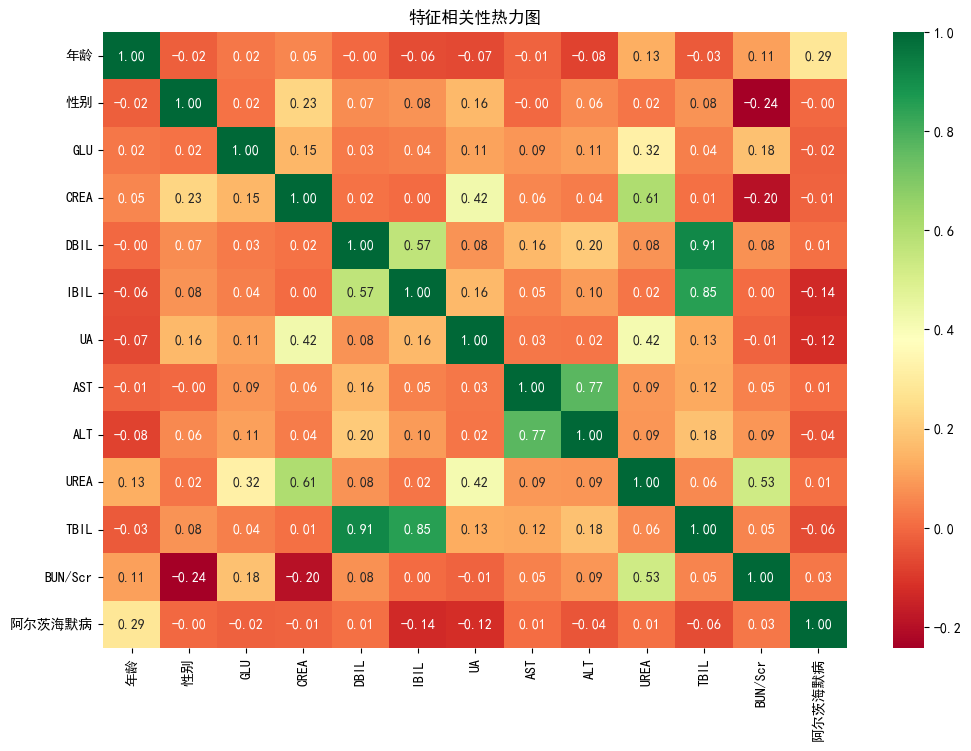

In [37]:
# 计算相关性矩阵
correlation_matrix = df_over65.corr()


print("相关性矩阵：")
print(correlation_matrix)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("特征相关性热力图")
plt.show()

# 保存图像
#plt.savefig('特征相关性热力图.png')

以下是一些显著的相关性（绝对值较高）：
DBIL 和 TBIL：相关系数为 0.913，说明两者高度正相关。这可能是因为直接胆红素（DBIL）和总胆红素（TBIL）在生理上有直接关系。
IBIL 和 TBIL：相关系数为 0.853，说明两者高度正相关。这同样符合生理学常识，因为直接胆红素（IBIL）是总胆红素（TBIL）的一部分。
CREA 和 UREA：相关系数为 0.607，说明两者中度正相关。这可能是因为肌酐（CREA）和尿素氮（UREA）都是肾功能的重要指标。
CREA 和 UA：相关系数为 0.423，说明两者中度正相关。这可能是因为肌酐（CREA）和尿酸（UA）都与肾功能有关。
ALT 和 AST：相关系数为 0.767，说明两者高度正相关。这可能是因为丙氨酸氨基转移酶（ALT）和天冬氨酸氨基转移酶（AST）都是肝功能的重要指标。
2. 与目标变量（阿尔茨海默病）的相关性
目标变量是“阿尔茨海默病”，我们重点关注它与其他特征的相关性：
年龄和阿尔茨海默病：相关系数为 0.286，说明年龄与阿尔茨海默病有中等程度的正相关。这符合医学常识，因为阿尔茨海默病的风险随着年龄增长而增加。
IBIL 和阿尔茨海默病：相关系数为 -0.135，说明直接胆红素（IBIL）与阿尔茨海默病有轻微的负相关。这可能提示某些生理机制，但需要进一步验证。
UA 和阿尔茨海默病：相关系数为 -0.125，说明尿酸（UA）与阿尔茨海默病有轻微的负相关。这可能与尿酸的抗氧化作用有关，但需要更多研究支持。
BUN/Scr 和阿尔茨海默病：相关系数为 0.027，说明尿素氮/肌酐比值（BUN/Scr）与阿尔茨海默病几乎没有相关性。
3. 其他观察
性别与其他特征的相关性：性别与其他特征的相关性普遍较低，说明性别对这些生理指标的影响较小。
GLU 和其他特征的相关性：血糖（GLU）与其他特征的相关性普遍较低，说明血糖与其他生理指标之间的线性关系较弱。
BUN/Scr 与其他特征的相关性：尿素氮/肌酐比值（BUN/Scr）与其他特征的相关性普遍较低，说明它是一个相对独立的指标。
4. 结论
生理指标之间的相关性：某些生理指标之间存在显著的相关性（如 DBIL 和 TBIL、CREA 和 UREA），这符合生理学常识。
年龄与阿尔茨海默病：年龄是阿尔茨海默病的重要风险因素，相关性显著。
其他特征与阿尔茨海默病：IBIL 和 UA 与阿尔茨海默病有轻微的负相关，可能提示某些潜在的生理机制，但需要进一步研究。
性别和 BUN/Scr 的影响：性别和 BUN/Scr 对其他特征的影响较小，可能不需要作为主要分析变量。
5. 下一步建议
深入分析显著相关性：对 DBIL 和 TBIL、CREA 和 UREA 等高度相关的特征，可以进一步研究它们的生理机制。
探索负相关性：对 IBIL 和 UA 与阿尔茨海默病的负相关性进行进一步研究，可能揭示某些潜在的保护机制。
考虑非线性关系：相关性分析仅反映线性关系，建议使用其他方法（如决策树、随机森林等）探索非线性关系。


特征对: DBIL 和 TBIL
皮尔逊相关系数: 0.9129
p 值: 0.0000


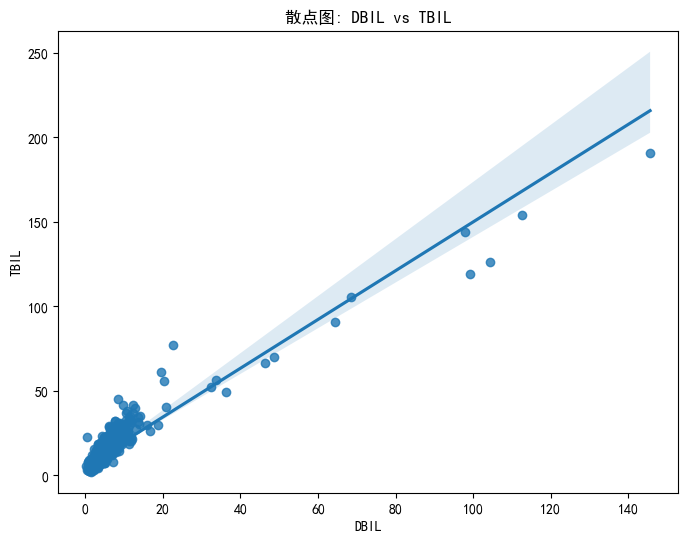


特征对: CREA 和 UREA
皮尔逊相关系数: 0.6067
p 值: 0.0000


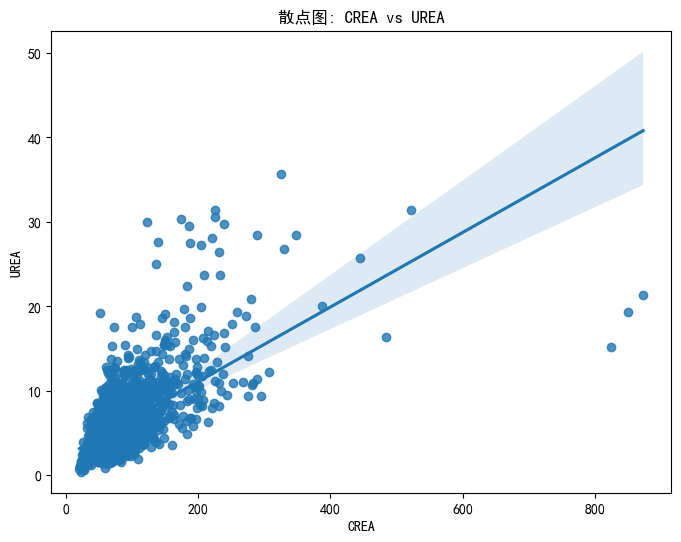


特征对: ALT 和 AST
皮尔逊相关系数: 0.7672
p 值: 0.0000


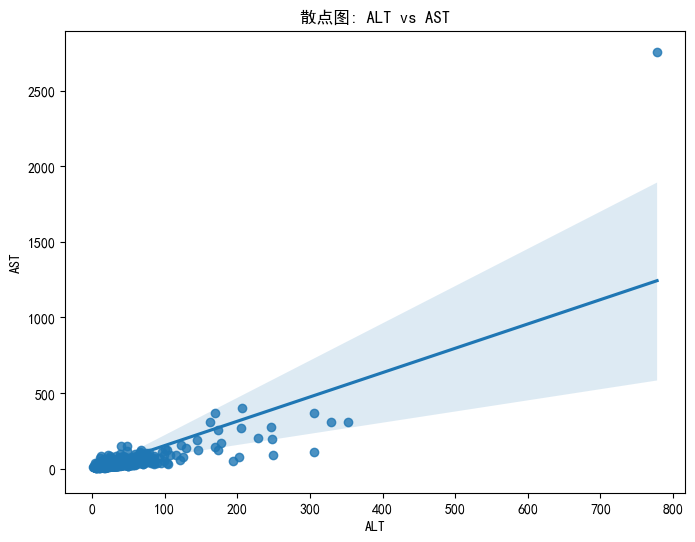


特征对: DBIL 和 IBIL
皮尔逊相关系数: 0.5664
p 值: 0.0000


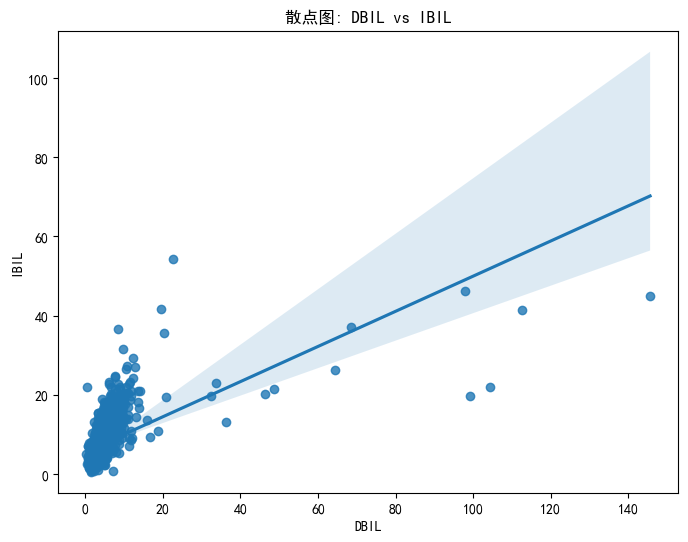


特征对: CREA 和 UA
皮尔逊相关系数: 0.4247
p 值: 0.0000


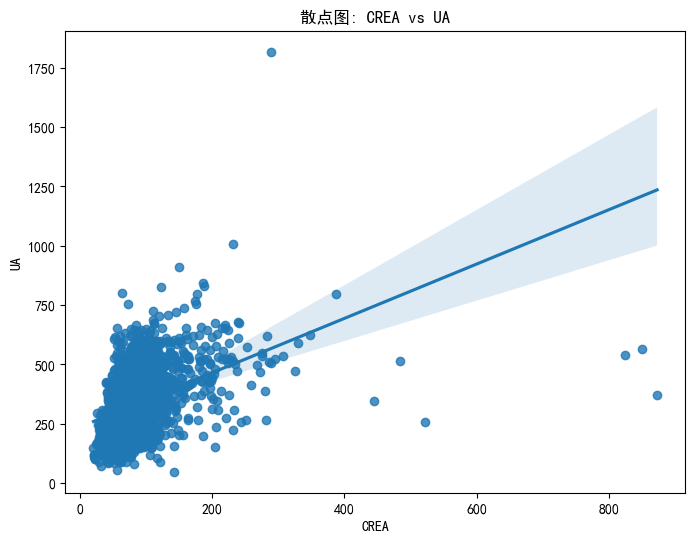


特征对: UREA 和 BUN/Scr
皮尔逊相关系数: 0.5278
p 值: 0.0000


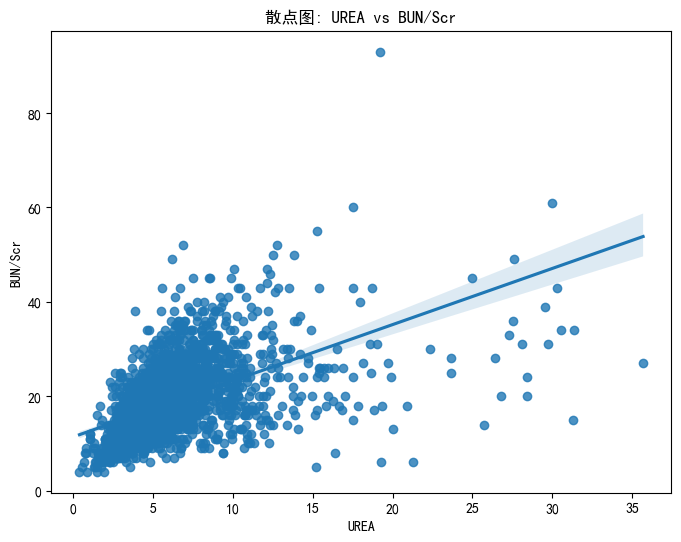

In [40]:
# 选择高度相关的特征对
pairs = [
    ('DBIL', 'TBIL'),
    ('CREA', 'UREA'),
    ('ALT', 'AST'),
    ('DBIL', 'IBIL'),
    ('CREA', 'UA'),
    ('UREA', 'BUN/Scr')
]

for x, y in pairs:
    data_x = df_over65[x]
    data_y = df_over65[y]
    
    correlation, p_value = stats.pearsonr(data_x, data_y)
    

    print(f"\n特征对: {x} 和 {y}")
    print(f"皮尔逊相关系数: {correlation:.4f}")
    print(f"p 值: {p_value:.4f}")
    
    
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data_x, y=data_y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"散点图: {x} vs {y}")
    plt.show()

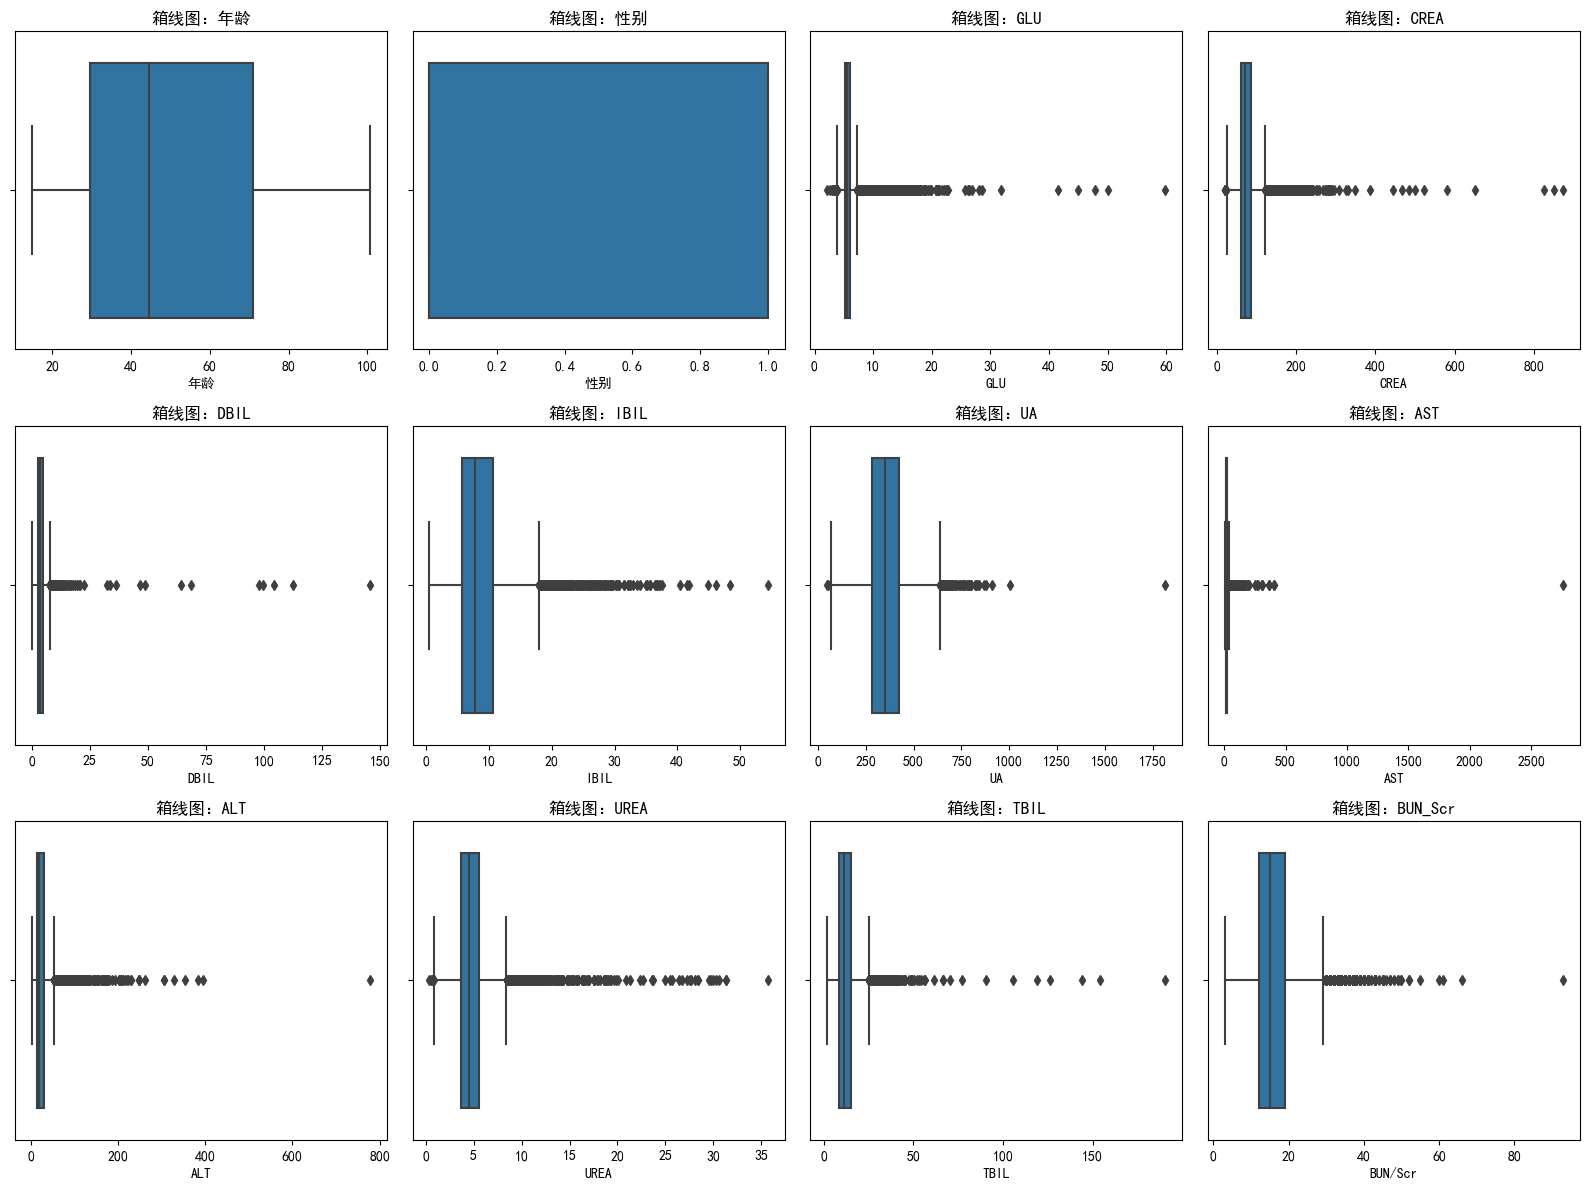

In [41]:
features = df_over65.columns[:-1] 

num_features = len(features)
num_rows = (num_features + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)


for i, column in enumerate(features):
    row = i // 4
    col = i % 4
    # 替换特征名中的斜杠
    safe_column = column.replace('/', '_')
    sns.boxplot(x=df_cleaned2[column], ax=axes[row, col])
    axes[row, col].set_title(f"箱线图：{safe_column}")

# 如果特征数量不是 4 的倍数，隐藏多余的子图
for i in range(num_features, num_rows * 4):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')


plt.tight_layout()

# 保存图像
#plt.savefig('combined_boxplots.png')

# 显示图像
plt.show()

In [42]:
# 设置异常值阈值（通常为 Z-score >= 3 或 <= -3）
threshold = 3

# 检测异常值
for column in df_over65.columns[:-1]:  
    z_scores = stats.zscore(df_over65[column])
    outliers = df_over65[column][(z_scores >= threshold) | (z_scores <= -threshold)]
    print(f"特征 '{column}' 的异常值：")
    print(outliers)

特征 '年龄' 的异常值：
3685    100.67
3751    100.67
7355    100.58
Name: 年龄, dtype: float64
特征 '性别' 的异常值：
Series([], Name: 性别, dtype: int64)
特征 'GLU' 的异常值：
119     15.84
122     16.22
722     15.80
919     17.18
1363    19.61
1470    21.02
1810    17.16
1885    15.67
2018    21.71
2076    19.94
2402    17.98
2719    26.34
2818    19.33
2978    22.78
2983    44.94
2992    15.58
3244    50.00
3265    17.87
3342    17.80
3384    18.49
3618    18.10
3962    18.03
3993    19.84
3994    16.03
3999    15.53
4002    19.66
4003    22.63
4013    28.61
4309    18.74
4334    17.32
4844    20.86
4859    19.02
4940    26.17
5004    27.98
5035    20.80
5148    20.80
5301    15.46
5320    59.86
5623    17.42
6069    31.86
6087    20.73
6107    18.64
6303    22.00
6628    18.11
6693    21.19
6709    16.11
6716    16.47
6779    15.62
6928    15.77
6944    16.04
7050    16.80
7150    47.82
7246    15.78
7263    26.43
7338    21.18
1833    20.89
4335    18.64
5145    18.03
Name: GLU, dtype: float64
特征 'CREA' 的异常值

数据集划分

In [43]:
#读取数据
data_65=pd.read_csv("C:\\Users\\lenovo\\毕设-20212133050\\data_over65.csv")
data_65.head()

,年龄,性别,GLU,CREA,DBIL,IBIL,UA,AST,ALT,UREA,TBIL,BUN/Scr,阿尔茨海默病
0,70.00,0,12.39,62.8,3.0,5.2,255.0,21.0,22.0,7.05,8.2,28.0,1
1,80.33,1,7.49,66.6,5.5,4.5,203.0,19.0,18.0,3.18,10.0,12.0,1
2,79.00,0,5.98,84.8,2.5,6.5,376.0,25.0,17.0,5.41,9.0,16.0,1
3,70.08,0,6.29,71.1,5.7,10.8,248.0,14.0,10.0,7.04,16.5,25.0,1
4,78.33,0,5.15,83.3,2.8,4.4,316.0,42.0,10.0,4.55,7.2,14.0,1


In [44]:
data_65.isnull().sum()

年龄         0
性别         0
GLU        0
CREA       0
DBIL       0
IBIL       0
UA         0
AST        0
ALT        0
UREA       0
TBIL       0
BUN/Scr    0
阿尔茨海默病     0
dtype: int64

In [45]:
X = data_65.iloc[:, :-1]
y = data_65.iloc[:, -1]

# 检查数据类型，确保都是数值型数据
if not X.select_dtypes(include='number').equals(X):
    raise ValueError("特征数据中存在非数值型数据")
    

# 分层划分数据集（确保患病比例一致）
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# 保存带标签的数据
train_data = pd.concat([X_train_df, y_train], axis=1)
test_data = pd.concat([X_test_df, y_test], axis=1)

#保存数据
#train_data.to_csv("data_train_65.csv", index=False)
#test_data.to_csv("data_test_65.csv", index=False)

In [46]:
print(train_data)

         年龄  性别   GLU   CREA  DBIL  IBIL     UA   AST   ALT   UREA  TBIL  \
1583  81.83   0  6.29   69.1   5.8  10.0  311.0  11.0   7.0   4.92  15.8   
2153  81.33   1  4.98   92.3   6.2   7.7  482.0  15.0  14.0   9.32  13.9   
443   68.75   0  8.18   46.1   2.4   5.1  185.0  36.0  31.0   3.40   7.5   
2140  68.08   0  5.20   70.1   2.8   7.9  336.0  28.0  21.0   5.64  10.7   
2155  92.25   1  5.41  137.8   6.2   8.3  515.0  48.0  13.0   7.18  14.5   
...     ...  ..   ...    ...   ...   ...    ...   ...   ...    ...   ...   
3014  69.83   0  6.10   59.0   2.9   6.2  310.0  18.0  15.0   4.27   9.1   
1866  91.83   1  4.81   81.9  16.8   9.4   81.0  26.0  53.0   5.48  26.2   
2579  73.42   0  5.27   67.2   3.5   8.3  223.0  24.0  17.0   5.44  11.8   
1945  73.50   0  5.77   69.1   1.2   3.6  335.0  19.0  23.0   5.34   4.8   
132   75.17   0  5.10   60.5   1.5   3.5  376.0  15.0  12.0  10.42   5.0   

      BUN/Scr  阿尔茨海默病  
1583     18.0       1  
2153     25.0       1  
443      18.0  

In [47]:
print(test_data)

         年龄  性别    GLU   CREA  DBIL  IBIL     UA   AST   ALT   UREA  TBIL  \
388   84.83   0   4.33   52.4   3.8   7.2  186.0  16.0   8.0   3.92  11.0   
359   74.67   1   5.97   92.3   8.0  13.4  339.0  21.0  24.0   7.32  21.4   
1974  79.50   1   6.08   77.4   5.7   8.9  451.0  22.0  26.0   7.71  14.6   
1526  81.08   1   5.05  140.1   5.0   7.6  403.0  23.0   6.0  13.42  12.6   
417   85.42   0   5.21   52.5   5.2   8.8  356.0  20.0  20.0   2.30  14.0   
...     ...  ..    ...    ...   ...   ...    ...   ...   ...    ...   ...   
2485  87.25   0  10.56   77.3   2.9   7.9  304.0  32.0  39.0   5.87  10.8   
2998  65.83   0   5.72   83.3   2.7   6.8  348.0  13.0  15.0   3.10   9.5   
1066  67.75   0   5.44   54.4   3.8   6.1  327.0  24.0  18.0   3.27   9.9   
1919  76.75   1   9.52   96.9   6.4  14.4  449.0  14.0  10.0   7.26  20.8   
1816  80.67   0   4.79   71.9   2.6   5.0  256.0  31.0  22.0   4.42   7.6   

      BUN/Scr  阿尔茨海默病  
388      19.0       1  
359      20.0       1  
197

In [54]:
# 1. 数据加载与预处理
data = pd.read_csv("C:\\Users\\lenovo\\毕设-20212133050\\df.csv")

# 检查关键列的值分布
print("阿尔茨海默病列取值分布:\n", data["阿尔茨海默病"].value_counts())
print("\n性别列取值分布:\n", data["性别"].value_counts())

# 2. 分组统计函数
def describe_feature(series):
    """根据数据类型返回统计描述"""
    if pd.api.types.is_numeric_dtype(series):
        return f"{series.mean():.2f} ± {series.std():.2f}"
    else:
        return f"{series.value_counts(normalize=True).iloc[0]*100:.1f}%"

# 3. 生成统计表
features =  ['年龄','性别',
                'TBIL', 'ALB', 'CK-MB', 'Na', 'GGT', 'GLU', 'HCY', 'AST', 'CREA', 'IBIL', 'BUN/Scr', 'K', 'APOB',
                'LDH', 'ALP', 'TP', 'A/G', 'TG','APOA-1', 'UA','GLOB','HbA1C', 'LDL-C', 'DBIL','CK', 'CYS-C', 'UREA',
                'HDL-C', 'TC', 'ALT', 'Cl']
summary_table = []

# 计算总体数量
total_count = len(data)

for feature in features:
    # 数据校验
    if feature not in data.columns:
        raise KeyError(f"特征列'{feature}'不存在于数据中")
    
    # 分组数据
    group_yes = data[data["阿尔茨海默病"] == 1 ][feature].dropna()
    group_no = data[data["阿尔茨海默病"] == 0 ][feature].dropna()
    
    # 计算分组占总体的比例
    yes_ratio = len(group_yes) / total_count * 100
    no_ratio = len(group_no) / total_count * 100
    
    # 统计描述
    overall_desc = describe_feature(data[feature])
    train_desc = describe_feature(group_yes)
    valid_desc = describe_feature(group_no)
    
    # 假设检验
    if pd.api.types.is_numeric_dtype(data[feature]):
        if len(group_yes) < 2 or len(group_no) < 2:
            p_value = np.nan
            print(f"特征 {feature} 进行 t 检验时，分组数据量不足（训练组: {len(group_yes)}, 验证组: {len(group_no)}）")
        else:
            _, p_value = ttest_ind(group_yes, group_no, equal_var=False, nan_policy='omit')
    else:
        contingency_table = pd.crosstab(data["阿尔茨海默病"], data[feature])
        if contingency_table.size == 0:
            p_value = np.nan
            print(f"特征 {feature} 进行卡方检验时，列联表为空")
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
    
    summary_table.append({
        "特征": feature,
        "整体": overall_desc,
        "训练组（是）": train_desc,
        "训练组占比(%)": f"{yes_ratio:.2f}",
        "验证组（否）": valid_desc,
        "验证组占比(%)": f"{no_ratio:.2f}",
        "P值": f"{p_value:.3f}" if not np.isnan(p_value) else "N/A"
    })

# 4. 结果展示
result_df = pd.DataFrame(summary_table)
print("\n统计分析结果表:")
print(result_df.to_string(index=False))

阿尔茨海默病列取值分布:
 0    10200
1     7433
Name: 阿尔茨海默病, dtype: int64

性别列取值分布:
 0    8895
1    8738
Name: 性别, dtype: int64

统计分析结果表:
     特征              整体          训练组（是） 训练组占比(%)          验证组（否） 验证组占比(%)    P值
     年龄            0.5%            1.0%    42.15            0.8%    57.85 0.000
     性别     0.50 ± 0.50     0.44 ± 0.50    42.15     0.54 ± 0.50    57.85 0.000
   TBIL    12.87 ± 7.54    11.21 ± 8.99    28.67    13.84 ± 6.36    49.35 0.000
    ALB    39.62 ± 6.31    37.14 ± 5.18    28.67    46.82 ± 2.82     9.88 0.000
  CK-MB   14.42 ± 38.96   14.46 ± 39.38    22.83   12.97 ± 10.28     0.54 0.225
     Na   142.92 ± 4.23   142.98 ± 4.25    33.40   140.12 ± 1.50     0.73 0.000
    GGT   32.86 ± 51.79   32.60 ± 54.72    28.67   33.57 ± 42.59    10.30 0.442
    GLU     6.01 ± 2.13     6.52 ± 2.99    23.76     5.70 ± 1.21    37.59 0.000
    HCY    15.85 ± 8.30   19.60 ± 11.68     0.67    14.68 ± 6.50     2.17 0.000
    AST   23.24 ± 44.66   26.09 ± 72.52    28.67   21.64 ± 12.66    51.21

In [55]:
data = pd.read_csv("C:\\Users\\lenovo\\毕设-20212133050\\df.csv")

# 检查关键列的值分布
if "阿尔茨海默病" in data.columns:
    print("阿尔茨海默病列取值分布:\n", data["阿尔茨海默病"].value_counts())
else:
    print("列 '阿尔茨海默病' 不存在于数据中，请检查列名是否正确。")
    raise KeyError("列 '阿尔茨海默病' 不存在于数据中，请检查列名是否正确。")

if "性别" in data.columns:
    print("\n性别列取值分布:\n", data["性别"].value_counts())
else:
    print("列 '性别' 不存在于数据中，请检查列名是否正确。")
    raise KeyError("列 '性别' 不存在于数据中，请检查列名是否正确。")

# 2. 分组统计函数
def describe_feature(series):
    """根据数据类型返回统计描述"""
    if pd.api.types.is_numeric_dtype(series):
        return f"{series.mean():.2f} ± {series.std():.2f}"
    else:
        return f"{series.value_counts(normalize=True).iloc[0]*100:.1f}%"

# 3. 生成统计表
features =  ['年龄','性别',
                'TBIL', 'ALB', 'CK-MB', 'Na', 'GGT', 'GLU', 'HCY', 'AST', 'CREA', 'IBIL', 'BUN/Scr', 'K', 'APOB',
                'LDH', 'ALP', 'TP', 'A/G', 'TG','APOA-1', 'UA','GLOB','HbA1C', 'LDL-C', 'DBIL','CK', 'CYS-C', 'UREA',
                'HDL-C', 'TC', 'ALT', 'Cl']
summary_table = []

# 计算总体数量
total_count = len(data)

for feature in features:
    # 数据校验
    if feature not in data.columns:
        raise KeyError(f"特征列'{feature}'不存在于数据中")
    
    # 分组数据
    group_yes = data[data["阿尔茨海默病"] == 1 ][feature].dropna()
    group_no = data[data["阿尔茨海默病"] == 0 ][feature].dropna()
    
    # 计算分组占总体的比例
    yes_ratio = len(group_yes) / total_count * 100
    no_ratio = len(group_no) / total_count * 100
    
    # 统计描述
    overall_desc = describe_feature(data[feature])
    train_desc = describe_feature(group_yes)
    valid_desc = describe_feature(group_no)
    
    # 假设检验
    if pd.api.types.is_numeric_dtype(data[feature]):
        if len(group_yes) < 2 or len(group_no) < 2:
            p_value = np.nan
            print(f"特征 {feature} 进行 t 检验时，分组数据量不足（训练组: {len(group_yes)}, 验证组: {len(group_no)}）")
        else:
            _, p_value = ttest_ind(group_yes, group_no, equal_var=False, nan_policy='omit')
    else:
        contingency_table = pd.crosstab(data["阿尔茨海默病"], data[feature])
        if contingency_table.size == 0:
            p_value = np.nan
            print(f"特征 {feature} 进行卡方检验时，列联表为空")
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
    
    summary_table.append({
        "特征": feature,
        "整体": overall_desc,
        "训练组（是）": train_desc,
        "训练组占比(%)": f"{yes_ratio:.2f}",
        "验证组（否）": valid_desc,
        "验证组占比(%)": f"{no_ratio:.2f}",
        "P值": f"{p_value:.3f}" if not np.isnan(p_value) else "N/A"
    })

# 4. 结果展示
result_df = pd.DataFrame(summary_table)

# 打印表格
print("\n统计分析结果表:")
print(result_df.to_string(index=False))

# 保存为 CSV 文件
#result_df.to_csv("统计分析结果表.csv", index=False, encoding="utf-8-sig")
#print("\n结果已保存到 '统计分析结果表.csv' 文件中。")

阿尔茨海默病列取值分布:
 0    10200
1     7433
Name: 阿尔茨海默病, dtype: int64

性别列取值分布:
 0    8895
1    8738
Name: 性别, dtype: int64

统计分析结果表:
     特征              整体          训练组（是） 训练组占比(%)          验证组（否） 验证组占比(%)    P值
     年龄            0.5%            1.0%    42.15            0.8%    57.85 0.000
     性别     0.50 ± 0.50     0.44 ± 0.50    42.15     0.54 ± 0.50    57.85 0.000
   TBIL    12.87 ± 7.54    11.21 ± 8.99    28.67    13.84 ± 6.36    49.35 0.000
    ALB    39.62 ± 6.31    37.14 ± 5.18    28.67    46.82 ± 2.82     9.88 0.000
  CK-MB   14.42 ± 38.96   14.46 ± 39.38    22.83   12.97 ± 10.28     0.54 0.225
     Na   142.92 ± 4.23   142.98 ± 4.25    33.40   140.12 ± 1.50     0.73 0.000
    GGT   32.86 ± 51.79   32.60 ± 54.72    28.67   33.57 ± 42.59    10.30 0.442
    GLU     6.01 ± 2.13     6.52 ± 2.99    23.76     5.70 ± 1.21    37.59 0.000
    HCY    15.85 ± 8.30   19.60 ± 11.68     0.67    14.68 ± 6.50     2.17 0.000
    AST   23.24 ± 44.66   26.09 ± 72.52    28.67   21.64 ± 12.66    51.21